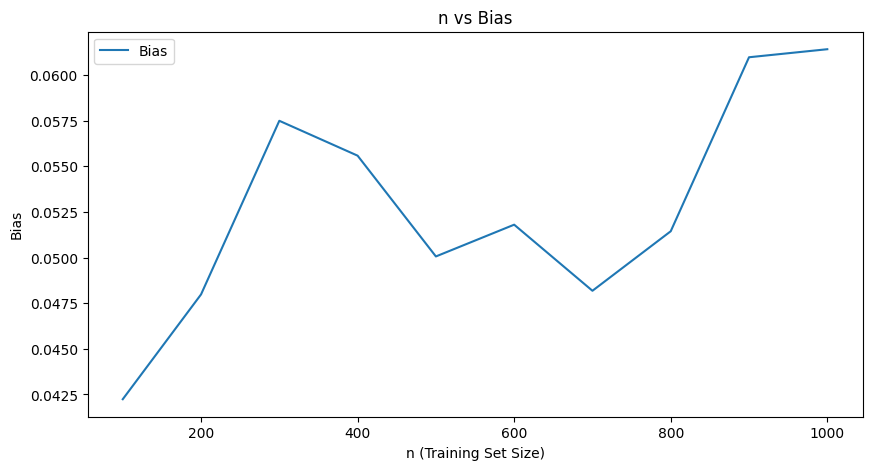

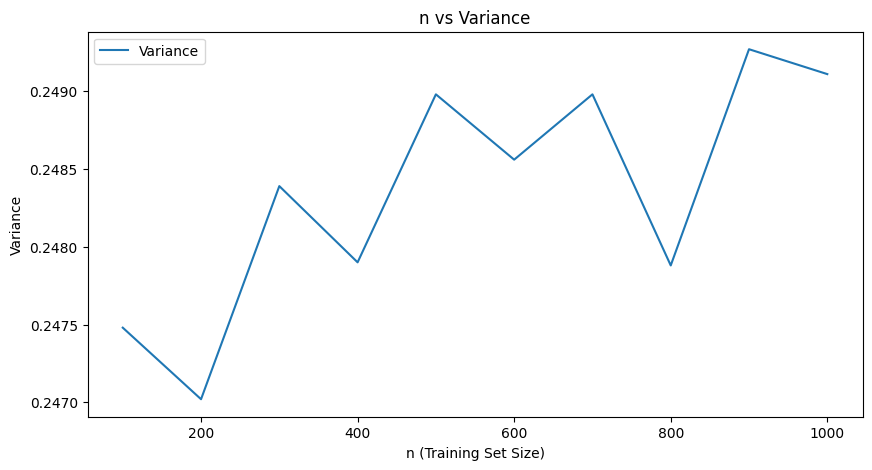

Size of training set (n): 100, Bias: 0.04224, Variance: 0.24747999999999998
Size of training set (n): 200, Bias: 0.047979999999999995, Variance: 0.24701999999999996
Size of training set (n): 300, Bias: 0.05749, Variance: 0.24838999999999994
Size of training set (n): 400, Bias: 0.055580000000000004, Variance: 0.2479
Size of training set (n): 500, Bias: 0.05006000000000001, Variance: 0.24897999999999998
Size of training set (n): 600, Bias: 0.0518, Variance: 0.24855999999999998
Size of training set (n): 700, Bias: 0.048179999999999994, Variance: 0.24897999999999998
Size of training set (n): 800, Bias: 0.05144000000000001, Variance: 0.24787999999999993
Size of training set (n): 900, Bias: 0.06097000000000001, Variance: 0.24926999999999996
Size of training set (n): 1000, Bias: 0.06141, Variance: 0.24911


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(mean, cov_matrix, size):
    return np.random.multivariate_normal(mean, cov_matrix, size)

def one_nearest_neighbor(train_data, train_labels, test_sample):
    distances = np.sum((train_data - test_sample)**2, axis=1)
    nearest_neighbor_index = np.argmin(distances)
    return train_labels[nearest_neighbor_index]

s = 100


n_values = np.arange(100, 1100, 100)

bias = []
variance = []

for n in n_values:
    local_biases = []
    local_variances = []

    for _ in range(10):  
        mean_class1 = [0, 2]
        mean_class2 = [0, 4]
        cov_matrix = np.eye(2)

        class1_data = generate_data(mean_class1, cov_matrix, n)
        class2_data = generate_data(mean_class2, cov_matrix, n)

        train_data = np.vstack((class1_data, class2_data))
        train_labels = np.hstack((np.zeros(n), np.ones(n)))

        test_class1_data = generate_data(mean_class1, cov_matrix, s//2)
        test_class2_data = generate_data(mean_class2, cov_matrix, s//2)
        test_data = np.vstack((test_class1_data, test_class2_data))
        test_labels = np.hstack((np.zeros(s//2), np.ones(s//2)))

        predictions = [one_nearest_neighbor(train_data, train_labels, sample) for sample in test_data]

        error = np.mean(predictions != test_labels)
        local_biases.append(error**2)
        local_variances.append(np.var(predictions))

    bias.append(np.mean(local_biases))
    variance.append(np.mean(local_variances))

# Plot n vs Bias and n vs Variance ------------------------------------------>
plt.figure(figsize=(10, 5))
plt.plot(n_values, bias, label='Bias')
plt.xlabel('n (Training Set Size)')
plt.ylabel('Bias')
plt.legend()
plt.title('n vs Bias')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(n_values, variance, label='Variance')
plt.xlabel('n (Training Set Size)')
plt.ylabel('Variance')
plt.legend()
plt.title('n vs Variance')
plt.show()

# Print ---------------------------------------------------------------------->
for i, n in enumerate(n_values):
    print(f"Size of training set (n): {n}, Bias: {bias[i]}, Variance: {variance[i]}")